<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU"  />

    
    
### <font color='navy'> Modelos no lineales para pronósticos. 

**Nombres:** Rafael Juarez Badillo Chavez y Paulo Adrián Villa Domínguez.

**Fecha:** 07 de enero del 2023.

**Expediente** : XXX, 733773.
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/RafaJBZ/Tarea_2_RAJuarez_PAVilla

# Tarea 2: Clase 4

## Enunciado de tarea.
> Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:
1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilitud, justificando la estructura propuesta.
2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo procedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis, incluyendo los resultados de las gráficas de ACF y PAC.
3. Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procedimiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad.
4. Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resultados en una gráfica donde se puedan observar los datos reales y los datos predichos,

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

warnings.filterwarnings("ignore")
plt.rc("font", size=12)

In [2]:
data = pd.read_csv(r'WWWusage.csv', names=[ 'values'], header=0)
data.index = data.index.droplevel()
data

,values
1,88
2,84
3,85
4,85
5,84
...,...
96,222
97,228
98,226
99,222


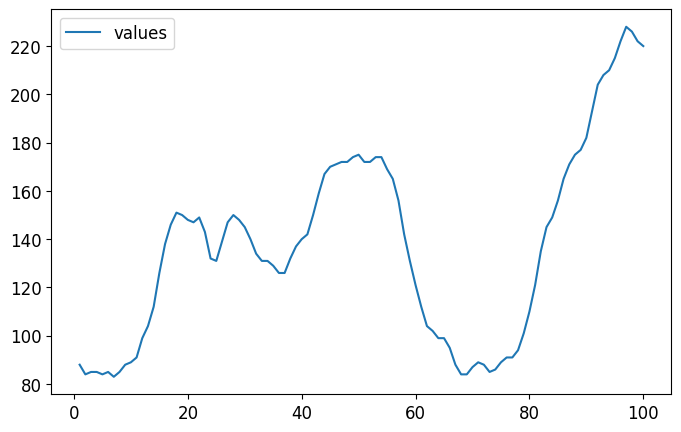

In [3]:
data.plot(figsize=(8,5))
plt.show()

In [4]:
# Función ADF
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)

    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

Código de solución estudiante 1

In [ ]:
# Código de solución estudiante 1

Código de solución estudiante 2

# Parte 1

In [5]:
# 1. Graficar ACF y PACF
def plot_acf_pacf(s_data, kwargs=dict):
    f = plt.figure(figsize=(8,5))
    ax1 = f.add_subplot(121)
    plot_acf(s_data, zero=False, ax=ax1, **kwargs)
    ax2 = f.add_subplot(122)
    plot_pacf(s_data, zero=False, ax=ax2, method='ols', **kwargs)
    plt.show()

In [6]:
def train_val_test_split(df, train_size=0.6, val_size=0.2):
    """
    Divide el dataframe en datos de entrenamiento, validación y prueba (el tamaño del de prueba se infiere de el de train y val).
    :param df: Dataframe que contiene una serie de tiempo
    :param train_size: Tamaño del set de entrenamiento
    :param val_size: Tamaño del set de validación
    :return: Dataframes divididos 1. Train 2. Val 3. Test
    """
    # Sacamos la posición en el index donde se separará
    train_index = int(len(df) * train_size)
    val_index = int(len(df) * (train_size + val_size))
    # Separamos por index
    train_split = df[:train_index]
    val_split = df[train_index:val_index]
    test_split = df[val_index:]
    return train_split, val_split, test_split

In [7]:
# Primer paso, revisar si nuestra serie es estacionaria.
adf_test(data)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


In [8]:
# Primero tenemos que hacer nuestra serie estacionaria.
diff1_values = data.diff().dropna()

adf_test(diff1_values)

Results of Dickey-Fuller Test:
Test Statistic                 -2.722238
p-value                         0.070268
#Lags Used                      2.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


Dado que el p-value es muy cercano al valor crítico, lo tomaré como que la serie es estacionaria, de no sacar buenos resultados volveré a diferenciar la serie.

In [25]:
# Dividimos nuestros datos en train, val y test
train, val, test = train_val_test_split(diff1_values, train_size=0.6, val_size=0.2)

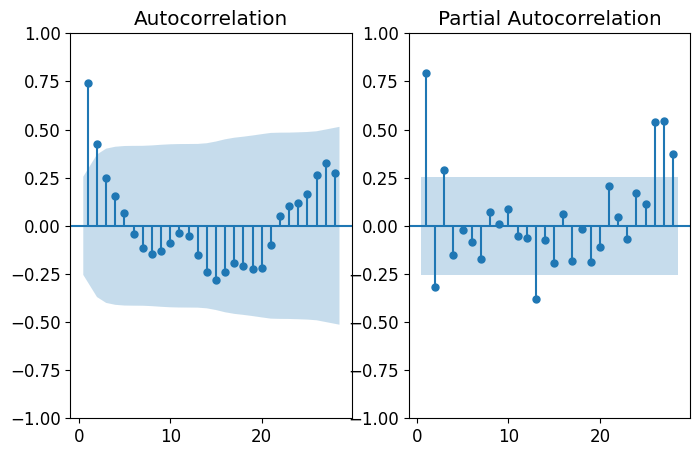

In [10]:
# Graficamos ACF y PACF
plot_acf_pacf(train, {'lags':28})

Para este caso me voy a ir con un modelo **ARIMA(p=3, d=1, q=0)**. Ya que parece que en la función de autocorrelación parece una caída exponencial y se normaliza un poco al paso del tiempo, mientras que en la función parcial, tenemos 3 lags significativos.

In [18]:
# Creamos el modelo ARIMA
arima_1 = ARIMA(train, order=(3, 1, 0))
model_1 = arima_1.fit()
print(model_1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   59
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -152.984
Date:                Tue, 07 Feb 2023   AIC                            313.968
Time:                        12:47:49   BIC                            322.209
Sample:                             0   HQIC                           317.178
                                 - 59                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2476      0.148      1.676      0.094      -0.042       0.537
ar.L2         -0.4232      0.114     -3.696      0.000      -0.648      -0.199
ar.L3          0.0442      0.155      0.285      0.7

Con este modelo ya tenemos un mejor rendimiento que con los vistos en clase, ya que tenemos mayor log verosimilitud, y menos AIC, BIC y HQIX.

## Parte 2

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data))
data_scaled

,0
0,0.034483
1,0.006897
2,0.013793
3,0.013793
4,0.006897
...,...
95,0.958621
96,1.000000
97,0.986207
98,0.958621


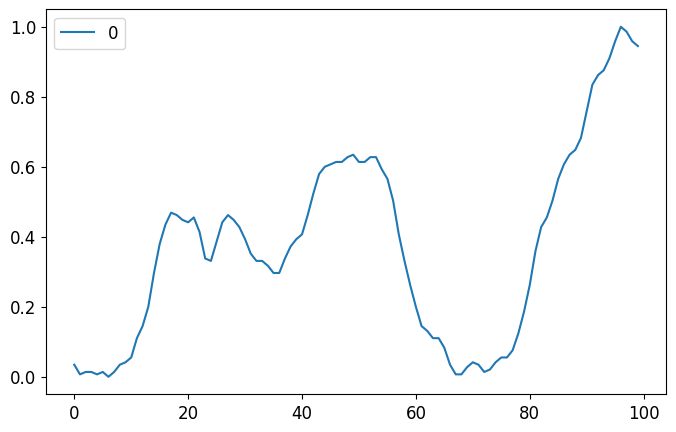

In [12]:
data_scaled.plot(figsize=(8,5))
plt.show()

In [13]:
# Revisamos si la serie es estacionaria
adf_test(data_scaled)

Results of Dickey-Fuller Test:
Test Statistic                 -2.464240
p-value                         0.124419
#Lags Used                      3.000000
Number of Observations Used    96.000000
Critical Value (1%)            -3.500379
Critical Value (5%)            -2.892152
Critical Value (10%)           -2.583100
dtype: float64
Non-stationary


Parece que al hacer un escalamiento sigue siendo lo mismo, la escala es mucho más pequeña, pero sigue con la misma forma a través del tiempo, al igual que al sacar el test de ADF los valores son los mismos. Por lo que aprovecharé para hacer la doble diferenciación y realizar el análisis ahora a partir de ahí.

In [14]:
# Diferenciamos ya que la serie no es estacionaria
diff_scaled = data_scaled.diff().diff().dropna()
# Realizamos el test de ADF
adf_test(diff_scaled)

Results of Dickey-Fuller Test:
Test Statistic                -9.929762e+00
p-value                        2.843429e-17
#Lags Used                     1.000000e+00
Number of Observations Used    9.600000e+01
Critical Value (1%)           -3.500379e+00
Critical Value (5%)           -2.892152e+00
Critical Value (10%)          -2.583100e+00
dtype: float64
Stationary


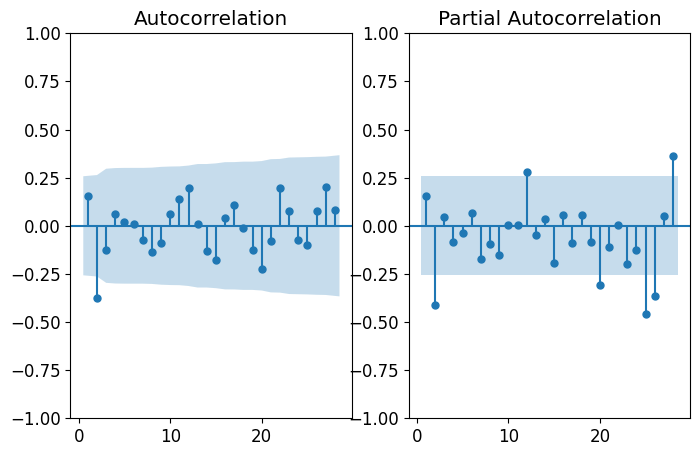

In [15]:
# Dividimos en train, test y validation
train_scaled, val_scaled, test_scaled = train_val_test_split(diff_scaled)

# Vemos las funciones de ACF y PACF
plot_acf_pacf(train_scaled, {'lags':28})

Parece que se repite el caso como el que vimos en clase, pues necesitaríamos un modelo **ARIMA((0,1), 2, (0,1))**.
Mejor me voy a quedar con el primer modelo generado y hacer las predicciones para ver que tanto se apega a los datos reales.

<AxesSubplot: >

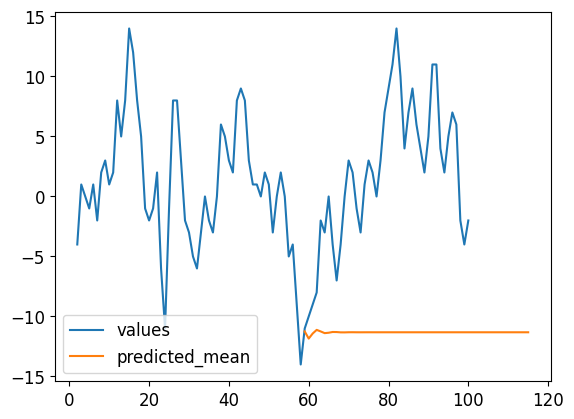

In [28]:
y_h = model_1.predict(start=59, end=115).to_frame()
ax = diff1_values.plot()
y_h.plot(ax=ax)

## Parte 3

In [49]:
import requests
from io import BytesIO
import statsmodels.api as sm
from datetime import datetime
from statsmodels.tsa.seasonal import STL

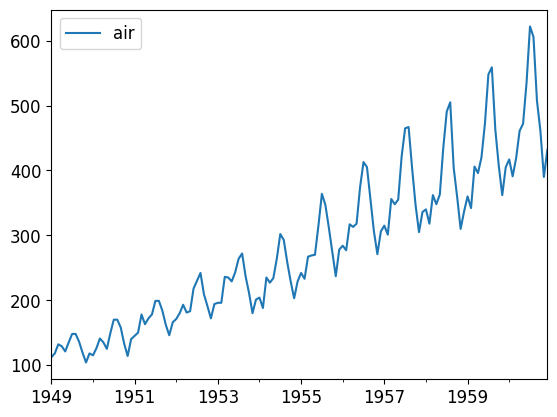

In [36]:
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
# Nos quedamos con la variable air
data2 = data2[["air"]]
data2.plot()
plt.show()

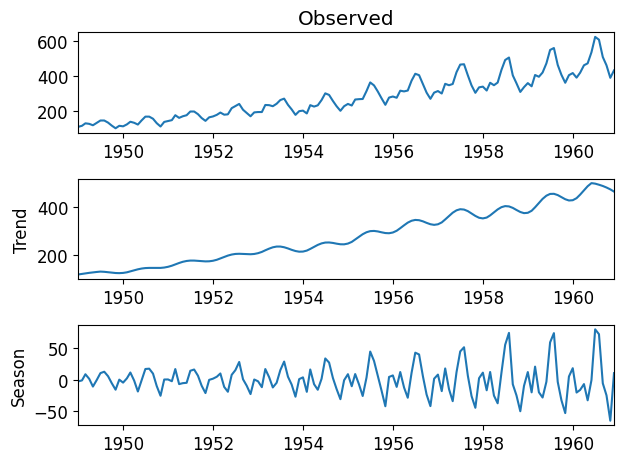

In [37]:
# Paquete para realizar descomposición de tendencia, estacionalidad y residuos
seasonal2 = STL(data2, period=4, seasonal_deg=2, seasonal=3)

# %timeit seasonal2.fit()
res = seasonal2.fit()
res.plot(resid=False, observed=True);

In [40]:
train_3, val_3, test_3 = train_val_test_split(data2)

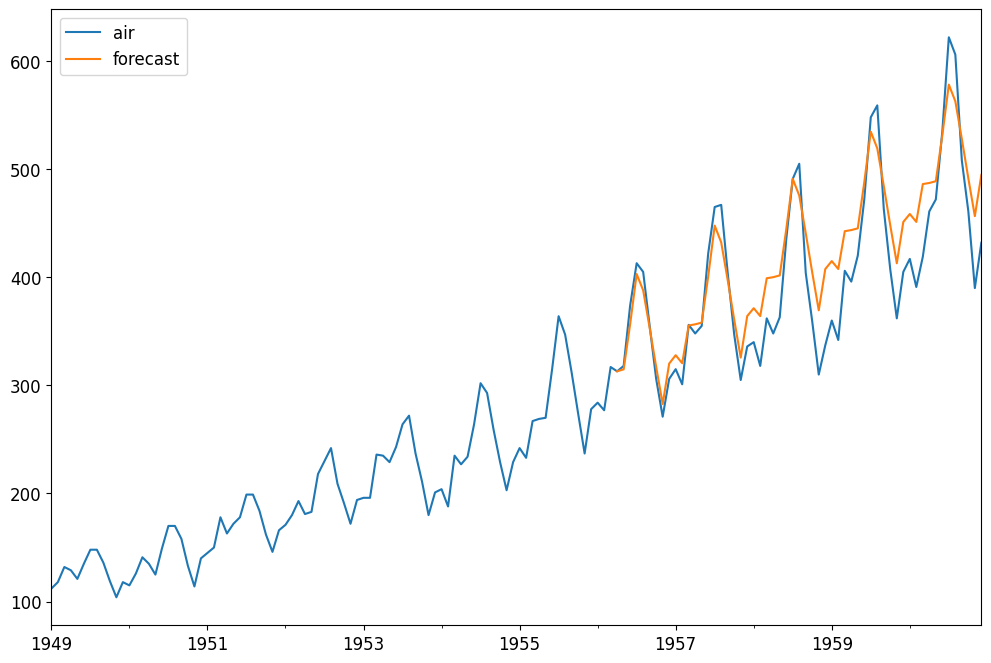

In [48]:
model=sm.tsa.statespace.SARIMAX(train_3, order=(1, 1, 1), seasonal_order=(1,1,1,12))
results=model.fit()
# Predecimos a partir de los datos de prueba y validación
data2['forecast'] = results.predict(start=87,end=144,dynamic=True)
data2[['air','forecast']].plot(figsize=(12,8))
plt.show()